# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

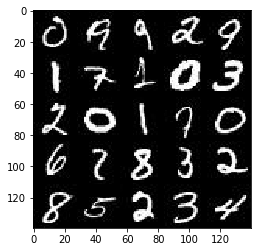

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

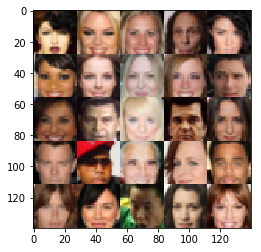

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    image_ph = tf.placeholder('float',shape=(None,image_width, image_height, image_channels))
    z_ph = tf.placeholder('float', shape=(None,z_dim))
    lr_ph = tf.placeholder('float')
    
    return image_ph, z_ph, lr_ph


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.09
    with tf.variable_scope('discriminator', reuse=reuse):
        x = tf.layers.conv2d(images, 64, 5, strides = 2, padding='same')
        x = tf.layers.batch_normalization(x, training=True)
        #x = tf.nn.relu(x)
        x = tf.maximum(alpha*x, x)
        
        x = tf.layers.conv2d(x, 128, 5, strides = 2, padding='same')
        x = tf.layers.batch_normalization(x, training=True)
        #x = tf.nn.relu(x)
        x = tf.maximum(alpha*x, x)
        
        x = tf.layers.conv2d(x, 256, 5, strides = 2, padding='same')
        x = tf.layers.batch_normalization(x, training=True)
        #x = tf.nn.relu(x)
        x = tf.maximum(alpha*x, x)
        
        #x = tf.contrib.layers.flatten(x)
        x = tf.reshape(x, (-1, 4*4*256))
        logits = tf.layers.dense(x, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.09
    with tf.variable_scope('generator', reuse = not is_train):
        
        x = tf.layers.dense(z, 256 * 7*7)
        #x = tf.nn.relu(x)
        #x = tf.maximum(alpha*x, x)
        
        x = tf.reshape(x, (-1, 7, 7, 256))
        x = tf.layers.conv2d_transpose(x, 512, 5, strides = 2, padding='same')
        x = tf.layers.batch_normalization(x, training=is_train)
        #x = tf.nn.relu(x)
        x = tf.maximum(alpha*x, x)
        
        x = tf.layers.conv2d_transpose(x, 256, 5, strides = 2, padding='same')
        x = tf.layers.batch_normalization(x, training=is_train)
        #x = tf.nn.relu(x)
        x = tf.maximum(alpha*x, x)
        
        logits = tf.layers.conv2d_transpose(x, out_channel_dim, 5, padding='same')
        
        out = tf.tanh(logits)
        
    return out
    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    fake_image = generator(input_z, out_channel_dim, True)
    real_out, real_logits = discriminator(input_real)
    fake_out, fake_logits = discriminator(fake_image, reuse = True)
    
    d_loss_real = tf.losses.sigmoid_cross_entropy(tf.ones_like(real_logits),
                                                 real_logits)
    d_loss_fake = tf.losses.sigmoid_cross_entropy(tf.zeros_like(fake_logits),
                                                 fake_logits)
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.losses.sigmoid_cross_entropy(tf.ones_like(fake_logits),
                                            fake_logits)
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    out_channel_dim = data_shape[3]
    
    image_ph, z_ph, lr_ph = model_inputs(data_shape[1], data_shape[2], out_channel_dim, z_dim)
    d_loss, g_loss = model_loss(image_ph, z_ph, out_channel_dim)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    count = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                # TODO: Train Model
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2
                
                _, d_l = sess.run([d_train_opt, d_loss],
                         feed_dict={image_ph:batch_images, z_ph:batch_z, lr_ph:learning_rate})
                _, g_l = sess.run([g_train_opt, g_loss],
                         feed_dict={image_ph:batch_images, z_ph:batch_z, lr_ph:learning_rate})
                _, g_l = sess.run([g_train_opt, g_loss],
                         feed_dict={image_ph:batch_images, z_ph:batch_z, lr_ph:learning_rate})
                
                if(count == 100):
                    print("Epoch: {}, d_loss: {}, g_loss:{}".format(epoch_i, d_l, g_l))
                    show_generator_output(sess, 16, z_ph, out_channel_dim, data_image_mode )
                    count = 0
                count+=1
            print("Epoch: {}, d_loss: {}, g_loss:{}".format(epoch_i, d_l, g_l))
            show_generator_output(sess, 16, z_ph, out_channel_dim, data_image_mode ) #batch_images.shape[0]
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch: 0, d_loss: 1.2719767093658447, g_loss:1.9523122310638428


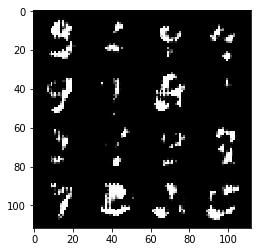

Epoch: 0, d_loss: 1.2305667400360107, g_loss:0.36679816246032715


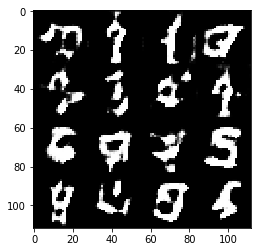

Epoch: 0, d_loss: 0.9420326352119446, g_loss:0.8629264831542969


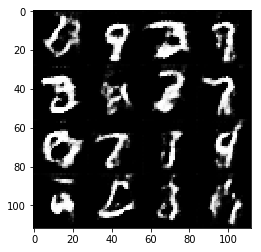

Epoch: 0, d_loss: 1.2432303428649902, g_loss:0.46506309509277344


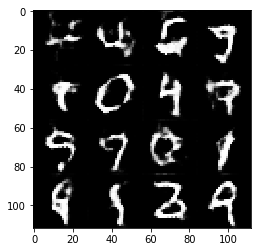

Epoch: 0, d_loss: 0.990315854549408, g_loss:0.5618554353713989


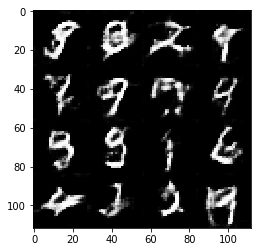

Epoch: 0, d_loss: 1.1945159435272217, g_loss:1.3178542852401733


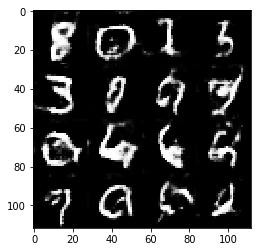

Epoch: 0, d_loss: 1.004677653312683, g_loss:0.6966320276260376


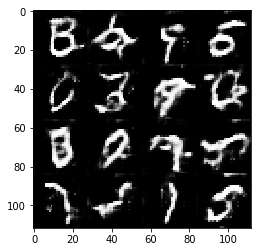

Epoch: 0, d_loss: 0.8416075706481934, g_loss:0.8053539395332336


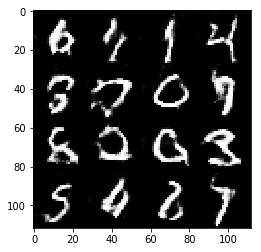

Epoch: 0, d_loss: 0.779144287109375, g_loss:0.8044958710670471


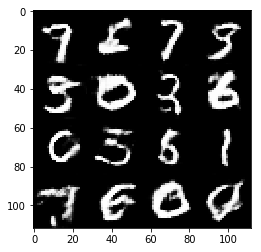

Epoch: 0, d_loss: 1.3244948387145996, g_loss:1.654876708984375


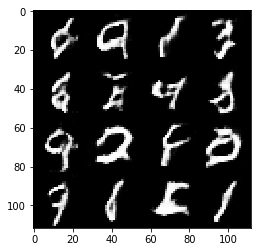

Epoch: 0, d_loss: 0.9086227416992188, g_loss:0.3236510753631592


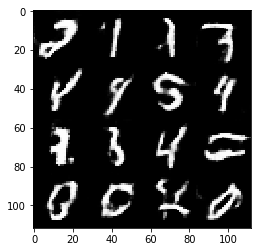

Epoch: 0, d_loss: 0.4209769368171692, g_loss:0.758208155632019


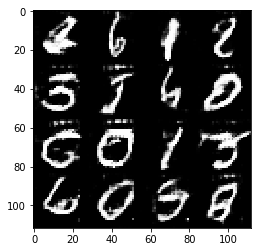

Epoch: 0, d_loss: 0.34313303232192993, g_loss:1.9146091938018799


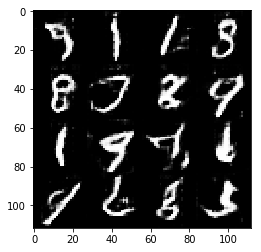

Epoch: 0, d_loss: 0.3596600890159607, g_loss:1.0713889598846436


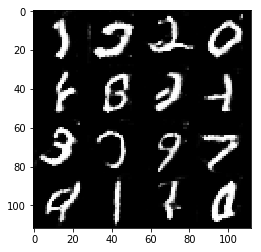

Epoch: 0, d_loss: 0.6990987062454224, g_loss:0.3737170100212097


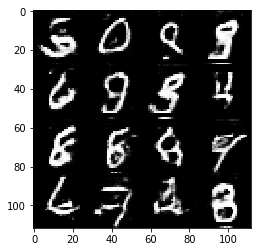

Epoch: 0, d_loss: 0.20365619659423828, g_loss:1.3103578090667725


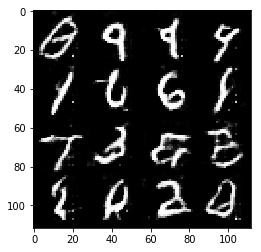

Epoch: 0, d_loss: 0.3325832486152649, g_loss:1.249094009399414


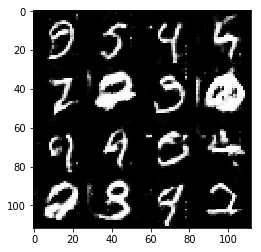

Epoch: 0, d_loss: 0.3443804681301117, g_loss:2.294163703918457


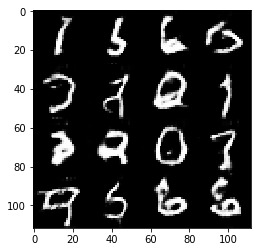

Epoch: 0, d_loss: 0.16789455711841583, g_loss:1.5862280130386353


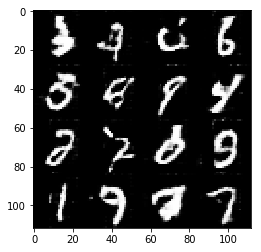

Epoch: 0, d_loss: 0.3447116017341614, g_loss:1.453683853149414


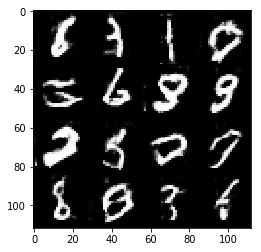

Epoch: 0, d_loss: 0.2827517092227936, g_loss:2.4942712783813477


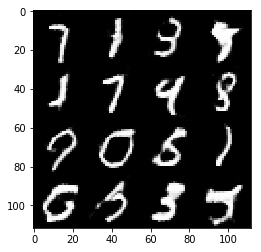

Epoch: 0, d_loss: 0.2109886109828949, g_loss:1.65482497215271


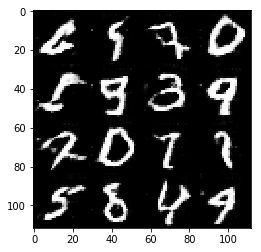

Epoch: 0, d_loss: 0.5411695837974548, g_loss:3.288799285888672


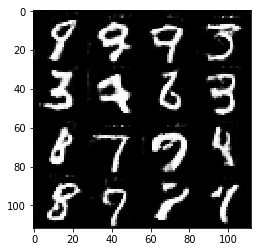

Epoch: 0, d_loss: 0.07870537042617798, g_loss:2.0074875354766846


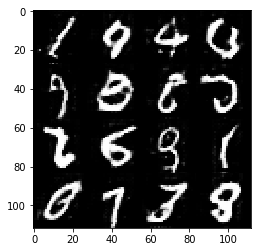

Epoch: 0, d_loss: 0.27779248356819153, g_loss:0.9617156982421875


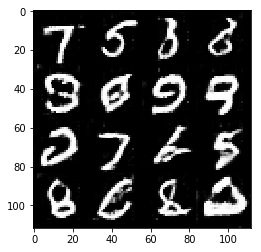

Epoch: 0, d_loss: 2.8411593437194824, g_loss:0.16058912873268127


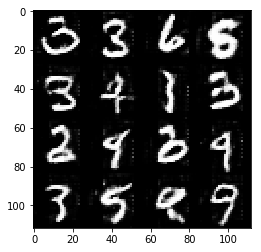

Epoch: 0, d_loss: 0.06681284308433533, g_loss:1.9788343906402588


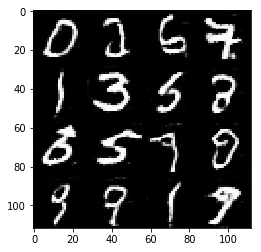

Epoch: 0, d_loss: 0.19853278994560242, g_loss:2.1482644081115723


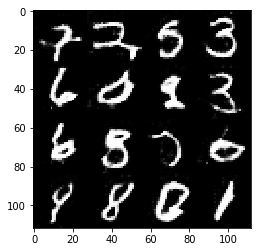

Epoch: 0, d_loss: 0.32295864820480347, g_loss:0.47966524958610535


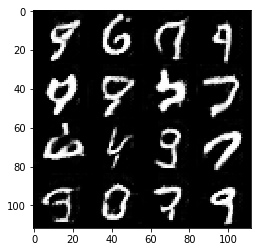

Epoch: 0, d_loss: 0.18111467361450195, g_loss:1.3031988143920898


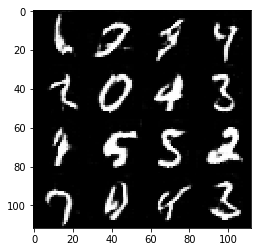

Epoch: 0, d_loss: 0.10274101048707962, g_loss:1.2211048603057861


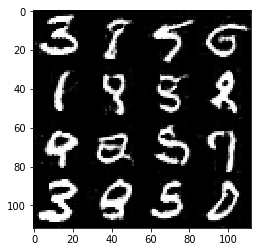

Epoch: 0, d_loss: 0.11328373104333878, g_loss:1.0555846691131592


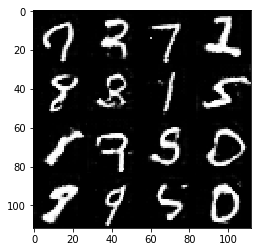

Epoch: 0, d_loss: 0.3081018924713135, g_loss:0.8878462910652161


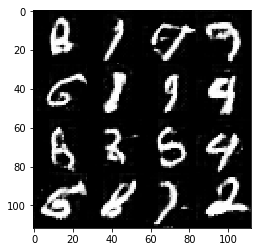

Epoch: 0, d_loss: 0.0857362151145935, g_loss:1.170125961303711


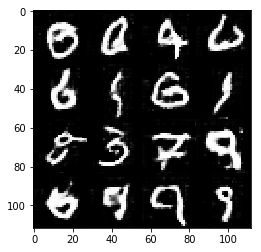

Epoch: 0, d_loss: 0.16949287056922913, g_loss:1.6478153467178345


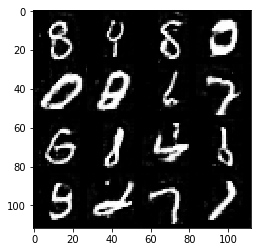

Epoch: 0, d_loss: 0.814602255821228, g_loss:4.013525009155273


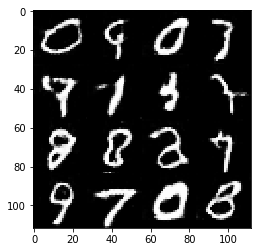

Epoch: 0, d_loss: 0.7626420259475708, g_loss:0.3844814896583557


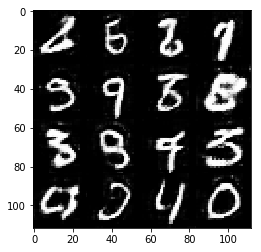

Epoch: 0, d_loss: 0.19541652500629425, g_loss:1.9692301750183105


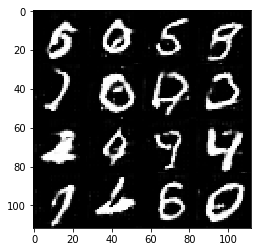

Epoch: 1, d_loss: 0.16231213510036469, g_loss:1.749619483947754


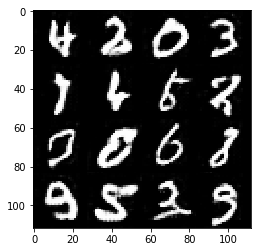

Epoch: 1, d_loss: 1.024208664894104, g_loss:0.38265979290008545


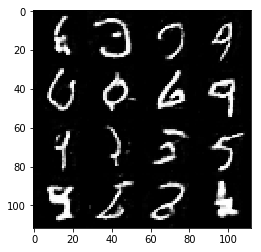

Epoch: 1, d_loss: 1.6084134578704834, g_loss:0.5183639526367188


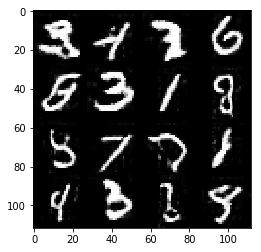

Epoch: 1, d_loss: 0.7085567116737366, g_loss:6.625082015991211


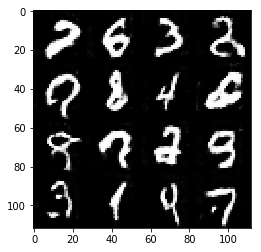

Epoch: 1, d_loss: 0.5907267332077026, g_loss:1.3650894165039062


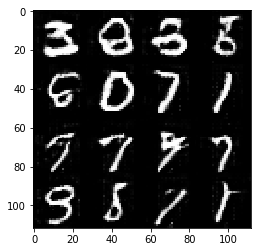

Epoch: 1, d_loss: 2.6157443523406982, g_loss:4.330535888671875


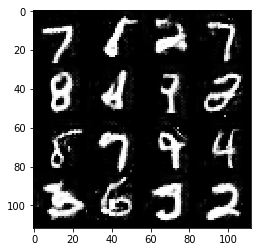

Epoch: 1, d_loss: 0.027294054627418518, g_loss:2.372101068496704


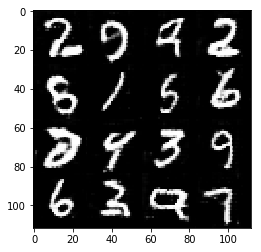

Epoch: 1, d_loss: 0.007452438585460186, g_loss:1.8693571090698242


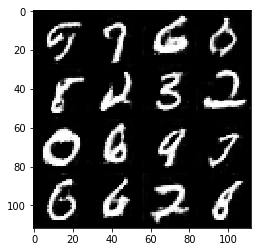

Epoch: 1, d_loss: 0.15474098920822144, g_loss:0.4633597433567047


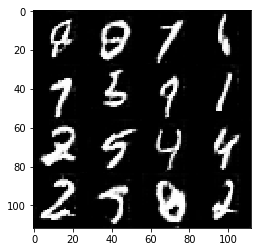

Epoch: 1, d_loss: 1.3643856048583984, g_loss:0.526933491230011


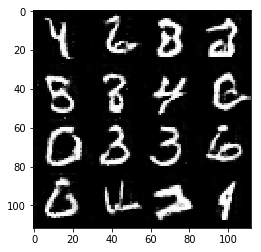

Epoch: 1, d_loss: 0.13950592279434204, g_loss:1.0542728900909424


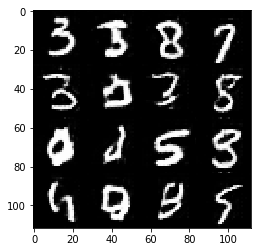

Epoch: 1, d_loss: 0.9645696878433228, g_loss:2.7407238483428955


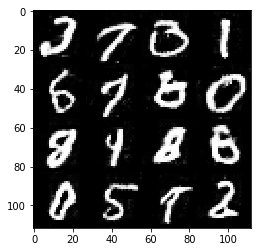

Epoch: 1, d_loss: 0.0942339077591896, g_loss:1.7626781463623047


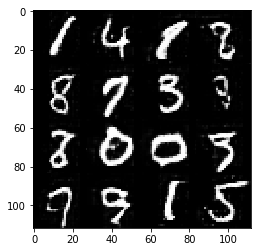

Epoch: 1, d_loss: 0.03374648839235306, g_loss:2.9392480850219727


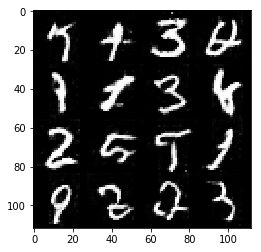

Epoch: 1, d_loss: 0.11292652785778046, g_loss:1.5871542692184448


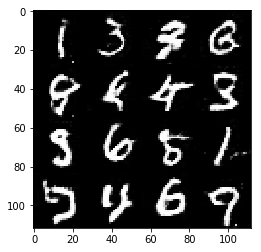

Epoch: 1, d_loss: 0.6814820170402527, g_loss:1.6630587577819824


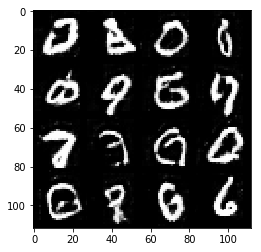

Epoch: 1, d_loss: 0.15194237232208252, g_loss:0.3050241470336914


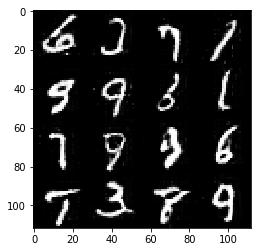

Epoch: 1, d_loss: 0.14146165549755096, g_loss:1.7053565979003906


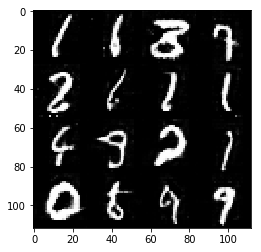

Epoch: 1, d_loss: 0.11401957273483276, g_loss:1.4144108295440674


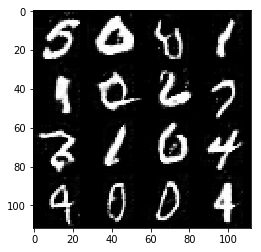

Epoch: 1, d_loss: 0.10964872688055038, g_loss:1.4202821254730225


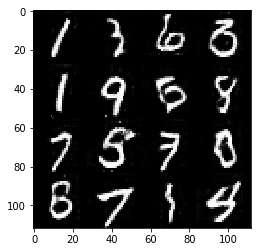

Epoch: 1, d_loss: 0.06130902096629143, g_loss:1.5601115226745605


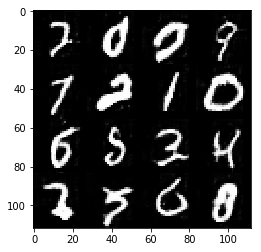

Epoch: 1, d_loss: 0.17237159609794617, g_loss:2.4700112342834473


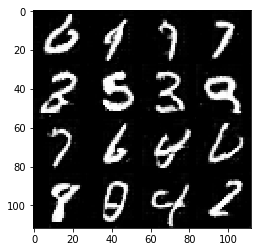

Epoch: 1, d_loss: 0.9142513871192932, g_loss:1.7690448760986328


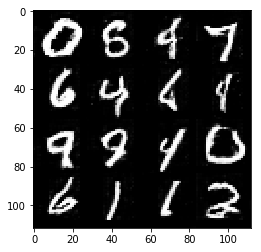

Epoch: 1, d_loss: 0.36924728751182556, g_loss:0.6610888242721558


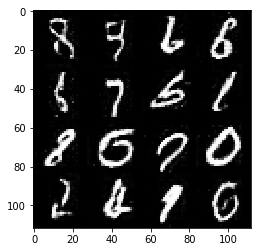

Epoch: 1, d_loss: 0.32795313000679016, g_loss:1.1788917779922485


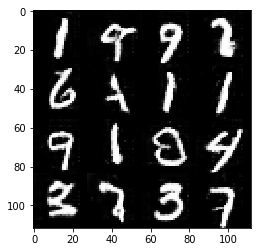

Epoch: 1, d_loss: 0.02782127447426319, g_loss:0.9668720364570618


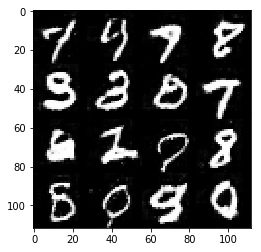

Epoch: 1, d_loss: 0.23057863116264343, g_loss:3.712393283843994


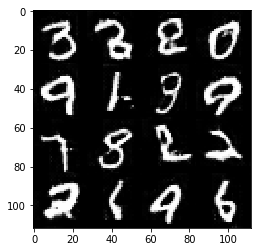

Epoch: 1, d_loss: 0.05477523058652878, g_loss:0.6747901439666748


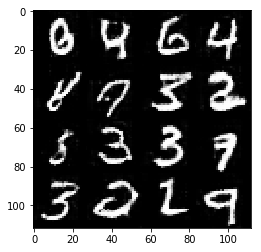

Epoch: 1, d_loss: 1.8198788166046143, g_loss:6.328411102294922


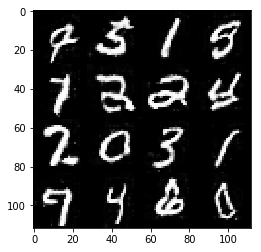

Epoch: 1, d_loss: 0.07073798030614853, g_loss:3.3942160606384277


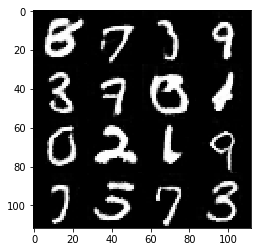

Epoch: 1, d_loss: 0.9757223725318909, g_loss:6.153899192810059


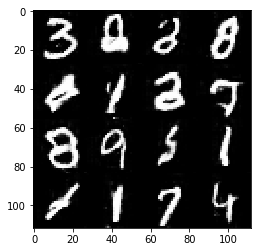

Epoch: 1, d_loss: 0.17667508125305176, g_loss:1.0886582136154175


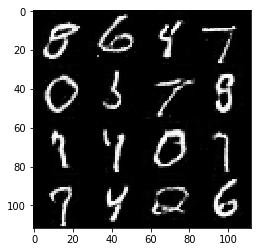

Epoch: 1, d_loss: 0.013081585988402367, g_loss:2.2388994693756104


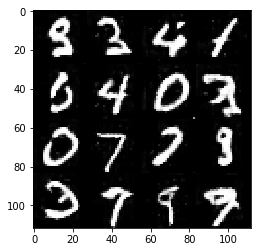

Epoch: 1, d_loss: 0.20199207961559296, g_loss:1.3066613674163818


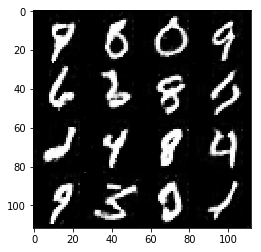

Epoch: 1, d_loss: 0.09391770511865616, g_loss:1.0270978212356567


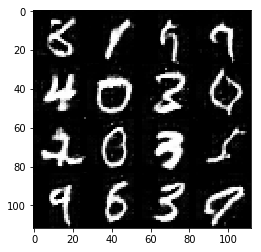

Epoch: 1, d_loss: 0.27187883853912354, g_loss:1.3797502517700195


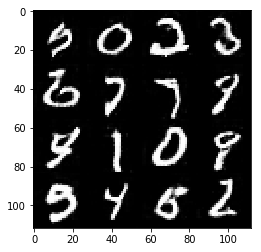

Epoch: 1, d_loss: 0.17382937669754028, g_loss:0.4171275794506073


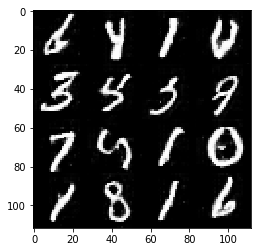

Epoch: 1, d_loss: 0.21507595479488373, g_loss:3.4406397342681885


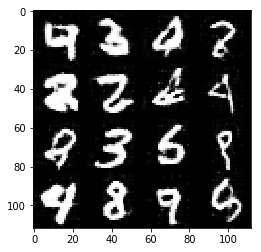

In [13]:
batch_size = 16
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch: 0, d_loss: 1.248739242553711, g_loss:1.3455623388290405


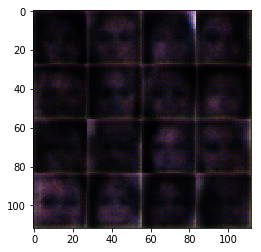

Epoch: 0, d_loss: 1.500190258026123, g_loss:1.0292906761169434


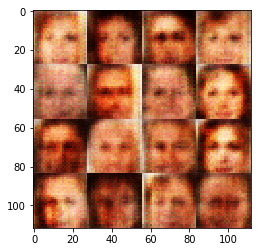

Epoch: 0, d_loss: 1.354527235031128, g_loss:1.0125832557678223


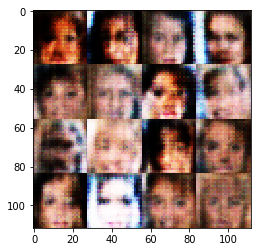

Epoch: 0, d_loss: 1.2353646755218506, g_loss:1.964198112487793


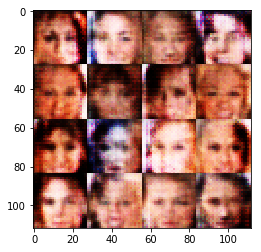

Epoch: 0, d_loss: 1.1071687936782837, g_loss:1.2790294885635376


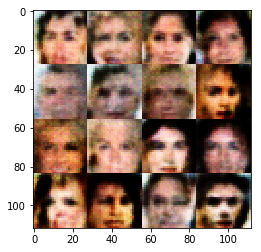

Epoch: 0, d_loss: 1.1244819164276123, g_loss:0.8110476732254028


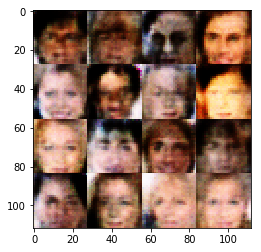

Epoch: 0, d_loss: 1.0193731784820557, g_loss:1.71915864944458


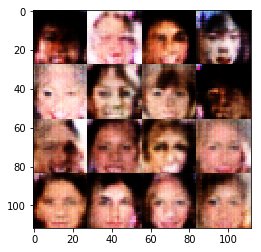

Epoch: 0, d_loss: 1.6775751113891602, g_loss:1.2245415449142456


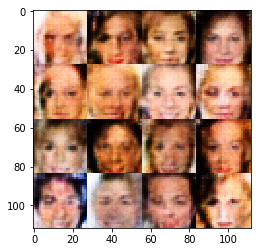

Epoch: 0, d_loss: 1.2518203258514404, g_loss:1.07722806930542


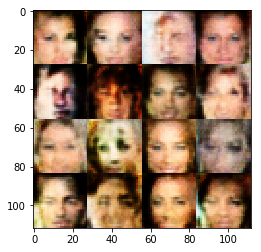

Epoch: 0, d_loss: 1.5190333127975464, g_loss:0.7799893021583557


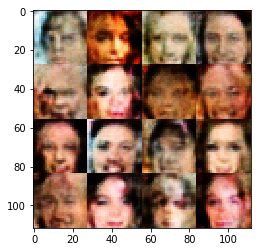

Epoch: 0, d_loss: 0.6997617483139038, g_loss:0.3226012587547302


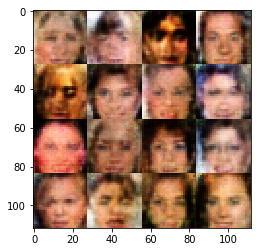

Epoch: 0, d_loss: 1.2063361406326294, g_loss:2.5846548080444336


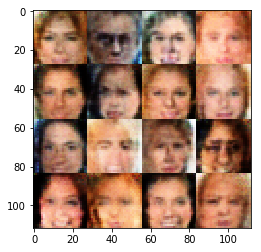

Epoch: 0, d_loss: 1.4335229396820068, g_loss:0.7587618827819824


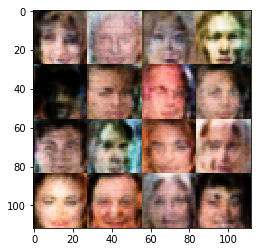

Epoch: 0, d_loss: 1.4013135433197021, g_loss:0.8413251638412476


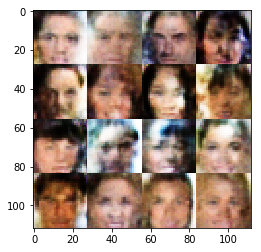

Epoch: 0, d_loss: 1.1611651182174683, g_loss:0.6720814108848572


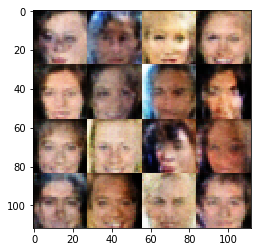

Epoch: 0, d_loss: 1.4697105884552002, g_loss:1.044074535369873


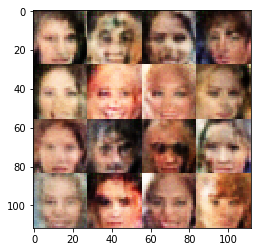

Epoch: 0, d_loss: 1.5855392217636108, g_loss:0.661841630935669


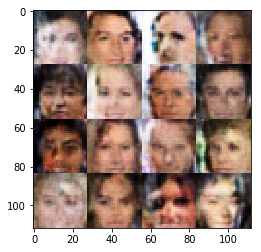

Epoch: 0, d_loss: 1.3028476238250732, g_loss:0.7736291289329529


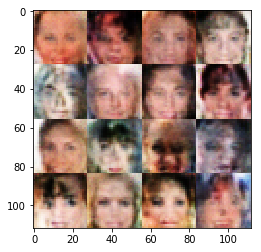

Epoch: 0, d_loss: 1.4813263416290283, g_loss:0.7107820510864258


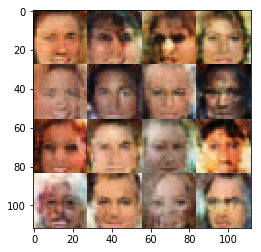

Epoch: 0, d_loss: 1.4531323909759521, g_loss:0.7003937363624573


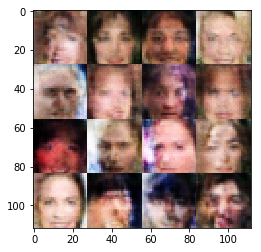

Epoch: 0, d_loss: 1.543236255645752, g_loss:0.9792454242706299


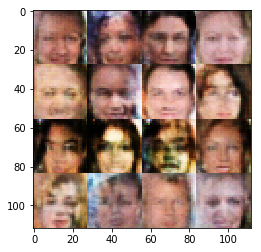

Epoch: 0, d_loss: 1.3534663915634155, g_loss:0.8329001665115356


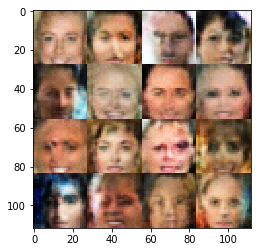

Epoch: 0, d_loss: 1.4233516454696655, g_loss:0.6774354577064514


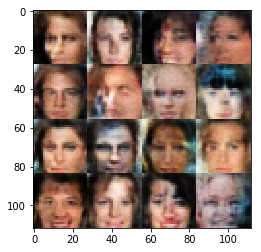

Epoch: 0, d_loss: 1.0428707599639893, g_loss:0.8524302840232849


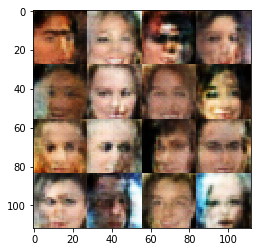

Epoch: 0, d_loss: 1.335639238357544, g_loss:0.8307719230651855


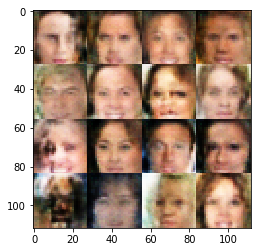

Epoch: 0, d_loss: 1.326572060585022, g_loss:0.6684896945953369


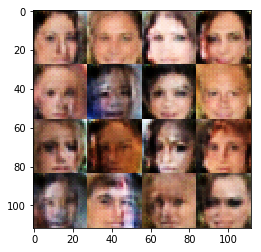

Epoch: 0, d_loss: 1.3888685703277588, g_loss:0.6957128643989563


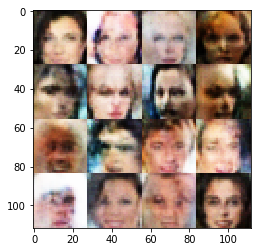

Epoch: 0, d_loss: 1.3481144905090332, g_loss:0.6290077567100525


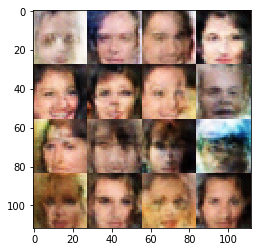

Epoch: 0, d_loss: 1.487689733505249, g_loss:0.6118330359458923


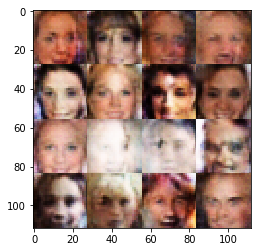

Epoch: 0, d_loss: 1.3676040172576904, g_loss:0.9360857605934143


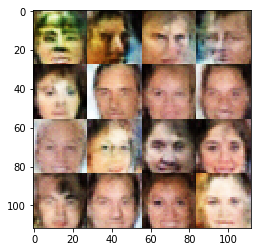

Epoch: 0, d_loss: 1.4919582605361938, g_loss:0.6590895056724548


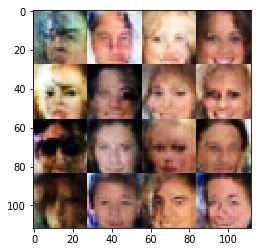

Epoch: 0, d_loss: 1.2276124954223633, g_loss:0.6966123580932617


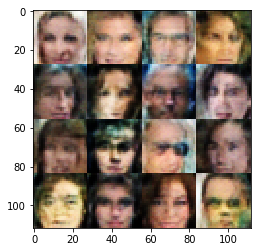

Epoch: 0, d_loss: 1.4306557178497314, g_loss:0.6792742013931274


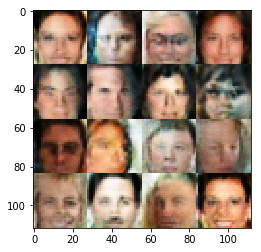

Epoch: 0, d_loss: 1.4829671382904053, g_loss:0.5781087875366211


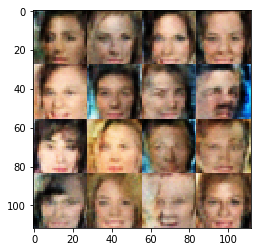

Epoch: 0, d_loss: 1.5590214729309082, g_loss:0.6971257328987122


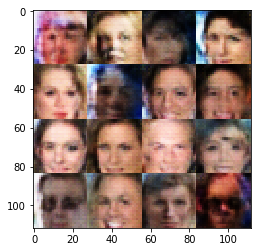

Epoch: 0, d_loss: 1.3775053024291992, g_loss:0.607058048248291


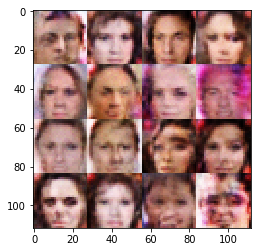

Epoch: 0, d_loss: 1.405403733253479, g_loss:0.7380229830741882


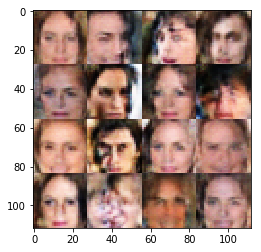

Epoch: 0, d_loss: 1.3426790237426758, g_loss:0.747684121131897


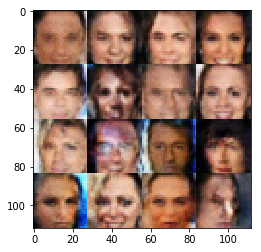

Epoch: 0, d_loss: 1.4207196235656738, g_loss:0.5923131108283997


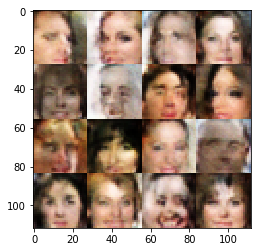

Epoch: 0, d_loss: 1.4079779386520386, g_loss:0.8439290523529053


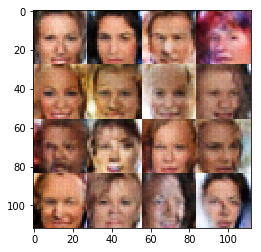

Epoch: 0, d_loss: 1.3250473737716675, g_loss:0.5991841554641724


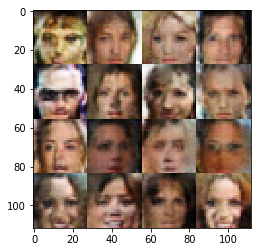

Epoch: 0, d_loss: 1.1208871603012085, g_loss:0.787330150604248


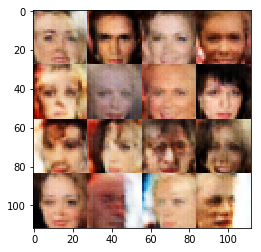

Epoch: 0, d_loss: 1.5241599082946777, g_loss:0.6464143991470337


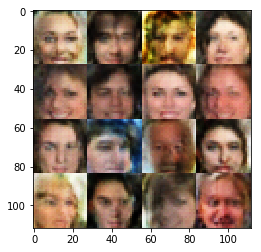

Epoch: 0, d_loss: 1.3303929567337036, g_loss:0.7681275606155396


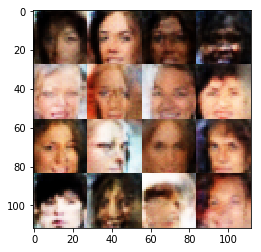

Epoch: 0, d_loss: 1.208665132522583, g_loss:0.5488976240158081


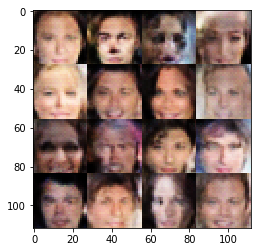

Epoch: 0, d_loss: 1.2784556150436401, g_loss:0.6802641153335571


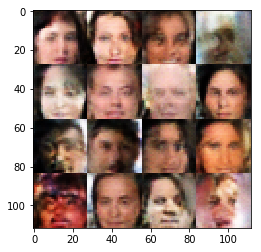

Epoch: 0, d_loss: 1.2678219079971313, g_loss:0.6905391216278076


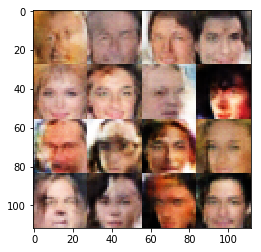

Epoch: 0, d_loss: 1.4653105735778809, g_loss:0.7800521850585938


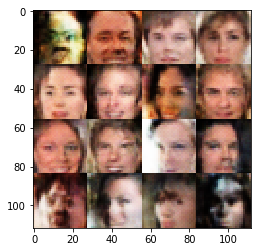

Epoch: 0, d_loss: 1.4184856414794922, g_loss:0.8459498882293701


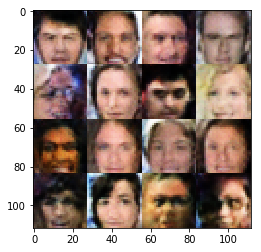

Epoch: 0, d_loss: 1.3820465803146362, g_loss:0.7266010046005249


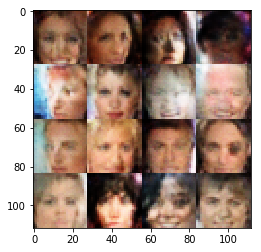

Epoch: 0, d_loss: 1.4194419384002686, g_loss:0.6915573477745056


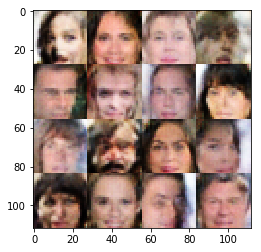

Epoch: 0, d_loss: 1.3580074310302734, g_loss:0.6625894904136658


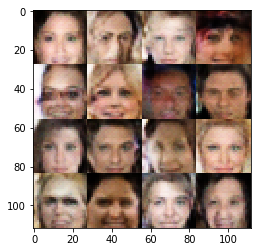

Epoch: 0, d_loss: 1.2790541648864746, g_loss:0.7997244596481323


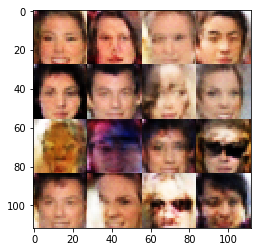

Epoch: 0, d_loss: 1.4484056234359741, g_loss:0.6556860208511353


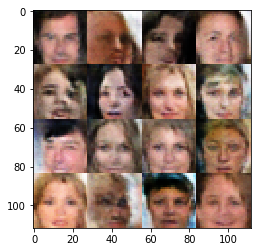

Epoch: 0, d_loss: 1.4085489511489868, g_loss:0.6751927137374878


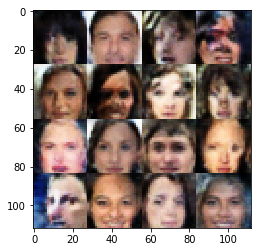

Epoch: 0, d_loss: 1.2465567588806152, g_loss:0.7144461870193481


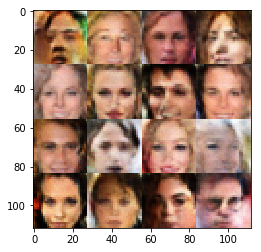

Epoch: 0, d_loss: 1.2224491834640503, g_loss:0.6526235342025757


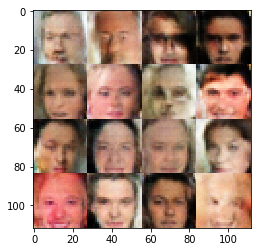

Epoch: 0, d_loss: 1.3657681941986084, g_loss:0.6833928823471069


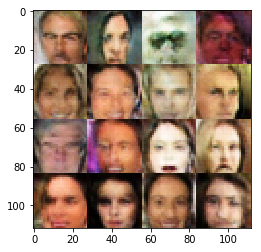

Epoch: 0, d_loss: 1.430837631225586, g_loss:0.6665456295013428


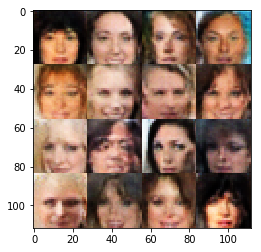

Epoch: 0, d_loss: 1.358959674835205, g_loss:0.7175318002700806


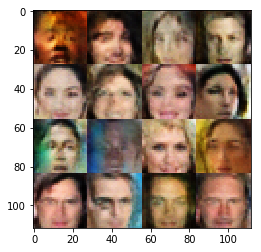

Epoch: 0, d_loss: 1.3163378238677979, g_loss:0.789147138595581


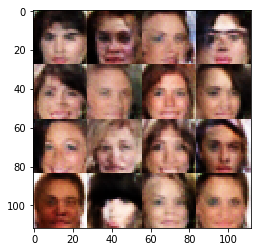

Epoch: 0, d_loss: 1.368802785873413, g_loss:0.6814808249473572


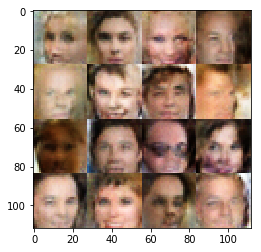

Epoch: 0, d_loss: 1.3818517923355103, g_loss:0.6651052236557007


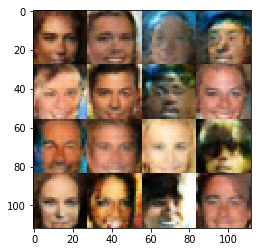

Epoch: 0, d_loss: 1.4721064567565918, g_loss:0.6078295707702637


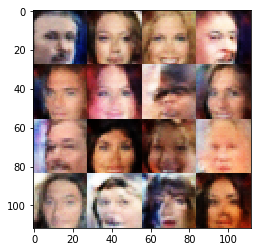

Epoch: 0, d_loss: 1.3938381671905518, g_loss:0.7684694528579712


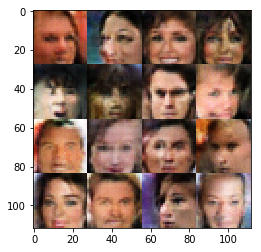

Epoch: 0, d_loss: 1.4115211963653564, g_loss:0.640256404876709


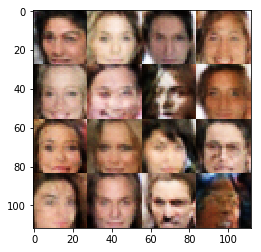

Epoch: 0, d_loss: 1.2314246892929077, g_loss:0.7309492826461792


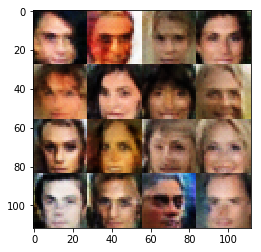

Epoch: 0, d_loss: 1.334048867225647, g_loss:0.6305510997772217


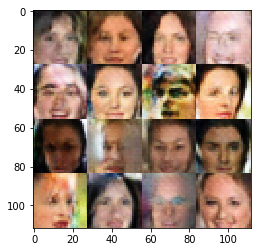

Epoch: 0, d_loss: 1.2878185510635376, g_loss:0.7286195755004883


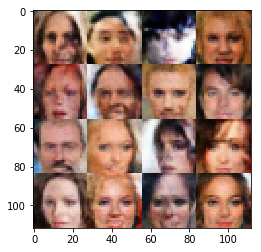

Epoch: 0, d_loss: 1.4542653560638428, g_loss:0.7062624096870422


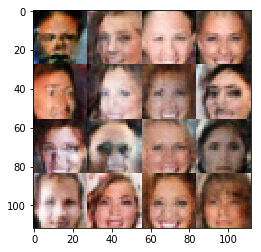

Epoch: 0, d_loss: 1.3157886266708374, g_loss:0.6694977283477783


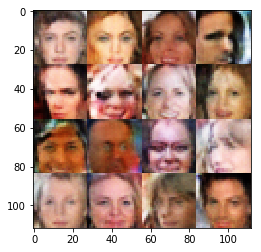

Epoch: 0, d_loss: 1.3724870681762695, g_loss:0.9161461591720581


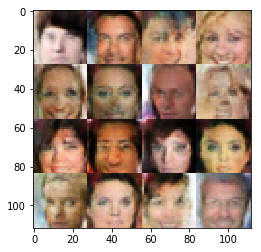

Epoch: 0, d_loss: 1.1138392686843872, g_loss:0.7969846725463867


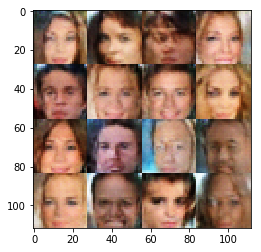

Epoch: 0, d_loss: 1.2293217182159424, g_loss:0.6448084712028503


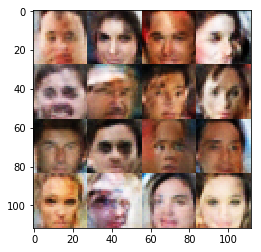

Epoch: 0, d_loss: 1.3306963443756104, g_loss:0.7201396226882935


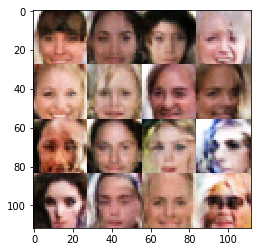

Epoch: 0, d_loss: 1.3276255130767822, g_loss:0.6608068943023682


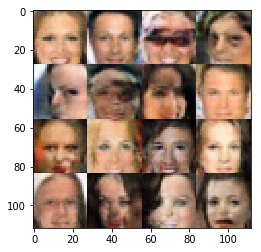

Epoch: 0, d_loss: 1.211466908454895, g_loss:0.6575684547424316


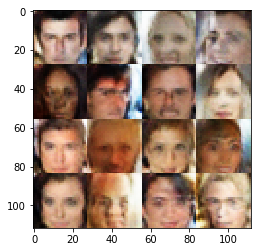

Epoch: 0, d_loss: 1.360673189163208, g_loss:0.7129714488983154


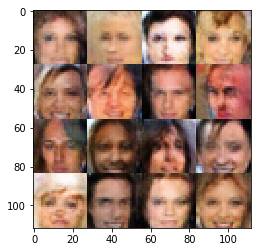

Epoch: 0, d_loss: 1.5175459384918213, g_loss:0.6089863777160645


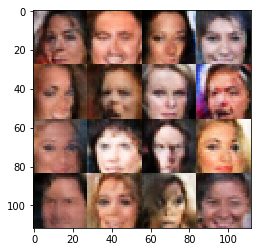

Epoch: 0, d_loss: 1.332553744316101, g_loss:0.6823616027832031


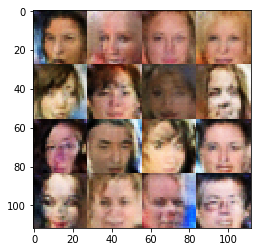

Epoch: 0, d_loss: 1.305080533027649, g_loss:0.7132798433303833


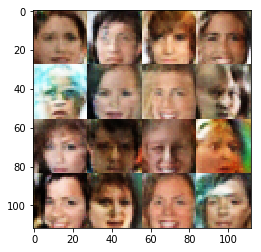

Epoch: 0, d_loss: 1.25931978225708, g_loss:0.7332428693771362


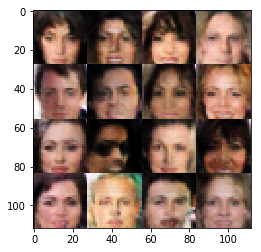

Epoch: 0, d_loss: 1.2373007535934448, g_loss:0.8259037137031555


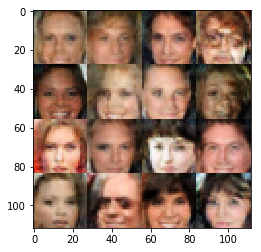

Epoch: 0, d_loss: 1.2423763275146484, g_loss:0.7512810230255127


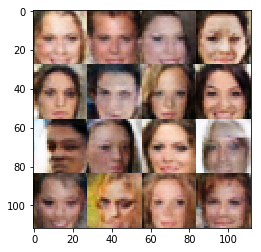

Epoch: 0, d_loss: 1.3090362548828125, g_loss:0.7225981950759888


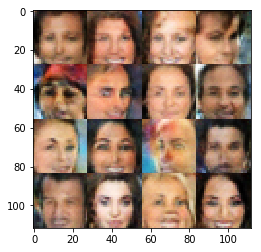

Epoch: 0, d_loss: 1.297008991241455, g_loss:0.7086339592933655


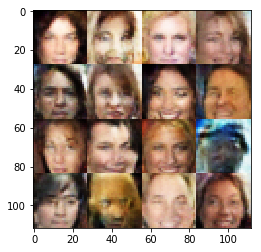

Epoch: 0, d_loss: 1.4403635263442993, g_loss:0.5910521745681763


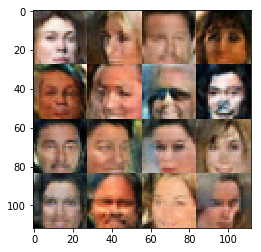

Epoch: 0, d_loss: 1.4683301448822021, g_loss:0.7025190591812134


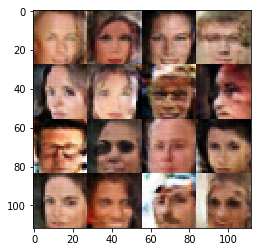

Epoch: 0, d_loss: 1.3585896492004395, g_loss:0.674351692199707


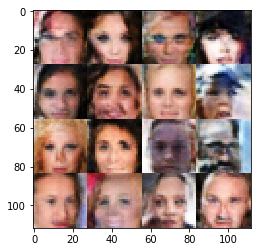

Epoch: 0, d_loss: 1.4299912452697754, g_loss:0.6596169471740723


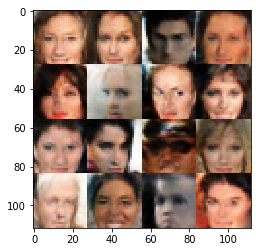

Epoch: 0, d_loss: 1.3339226245880127, g_loss:0.6541863679885864


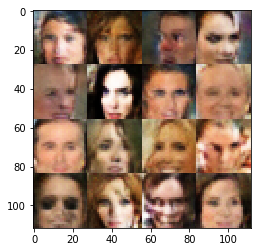

Epoch: 0, d_loss: 1.2238433361053467, g_loss:0.8166130781173706


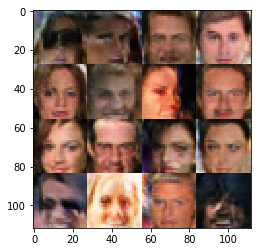

Epoch: 0, d_loss: 1.5103245973587036, g_loss:0.630143404006958


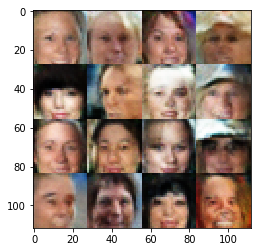

Epoch: 0, d_loss: 1.326672077178955, g_loss:0.6606731414794922


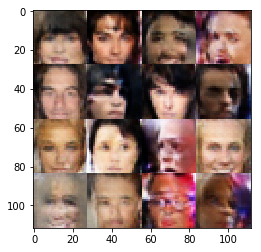

Epoch: 0, d_loss: 1.4164726734161377, g_loss:0.6651268005371094


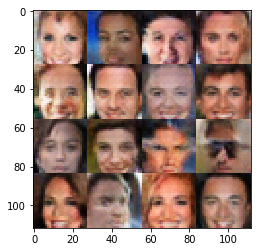

Epoch: 0, d_loss: 1.2836946249008179, g_loss:0.6964814066886902


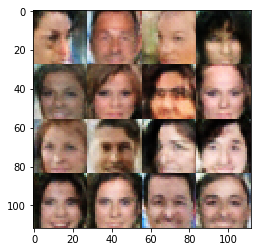

Epoch: 0, d_loss: 1.3064483404159546, g_loss:0.8129538297653198


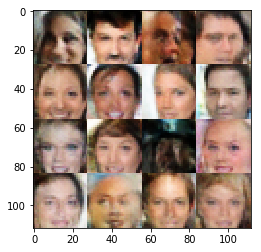

Epoch: 0, d_loss: 1.3864357471466064, g_loss:0.6245337724685669


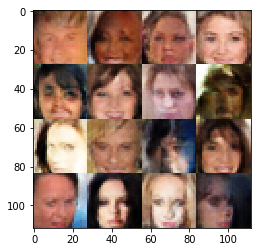

KeyboardInterrupt: 

In [14]:
batch_size = 16
z_dim = 100
learning_rate =  0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.